In [1]:
from _util import *
import _Experiment as _Experiment
import Agents_Cascading._agent_Cascading_TS as _agent_Cascading_TS 
import Agents_Cascading._agent_Cascading_GLM as _agent_Cascading_GLM 
import Agents_Cascading._agent_Cascading_MTTS as _agent_Cascading_MTTS
reload(_agent_Cascading_TS)
reload(_agent_Cascading_GLM)
reload(_agent_Cascading_MTTS)


<module 'Agents_Cascading._agent_Cascading_MTTS' from '/home/ec2-user/SageMaker/NeurlPS/Agents_Cascading/_agent_Cascading_MTTS.py'>

In [6]:
L, T, K, p = 8000, 20000, 5, 10
with_intercept = True
same_reward = True
n_init = 300
Sigma_gamma_factor = p * 2
results = {}
d = 10
phi_beta = 0.002
X_transform = 'standardize'
with_intercept = 1

update_freq = 500
update_freq_linear = 500

pm_core = 16
fp = 'Data/Cascading_realdata_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
out = load(fp)   
W_test = load('Data/W_test.txt')
W_test = W_test[:,:]
p = d
if with_intercept:
    p += 1
mu_gamma = np.zeros(p)
sigma_gamma = np.identity(p)
true_gamma = out['true_gamma_wrt_test']
true_theta = out['W_test_mean'].copy()
true_theta = true_theta[:]
X = out['movie_features'][:,:].copy()

real = True
regret_type = 0 #the optimal S is selected by the save function as the movie recommendation in Movie-Recommendation-using-Cascading-Bandits

L=8000 T=20000 K=5 p=11 phi_beta=0.002 Bandit_type=Cascading with_intercept=1 save_prefix=Cascading_real Sigma_gamma_factor=20 Sigma_x_factor=1 MTS_freq=500 GLB_freq=500 n_init=300 alpha_GLB=1 used_agends=all LB_freq=1 regret_type=0
batch = 0


Feature-determined TS: 100%|██████████| 20000/20000 [03:39<00:00, 90.96it/s] 


batch = 1


Meta TS (Ours): 100%|██████████| 20000/20000 [35:14<00:00,  9.46it/s] 


batch = 2


Meta TS (Ours): 100%|██████████| 20000/20000 [37:24<00:00,  8.91it/s] 


batch = 3


Meta TS (Ours): 100%|██████████| 20000/20000 [43:58<00:00,  7.58it/s]  


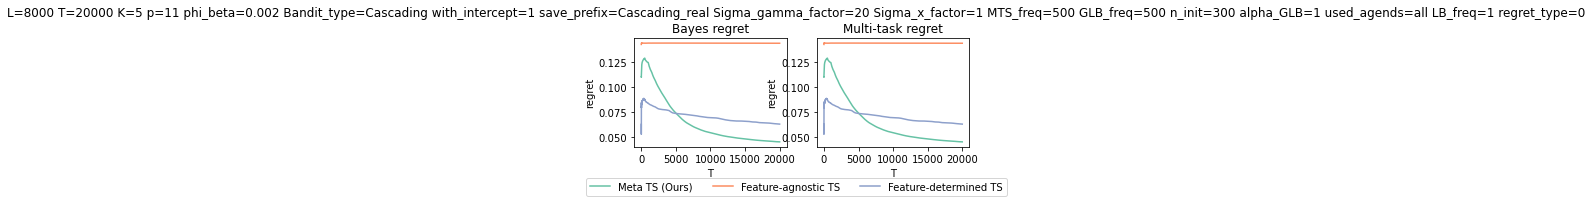

phi_beta0.002_Bandit_typeCascading_with_intercept1_Sigma_gamma_factor20_Sigma_x_factor1_MTS_freq500_GLB_freq500_n_init300_alpha_GLB1_used_agendsall_LB_freq1_regret_type0
save to res/0730/Cascading/_L8000_T20000_K5_p11/phi_beta0.002_Bandit_typeCascading_with_intercept1_Sigma_gamma_factor20_Sigma_x_factor1_MTS_freq500_GLB_freq500_n_init300_alpha_GLB1_used_agendsall_LB_freq1_regret_type0-Cascading_real


In [ ]:
reload(_Experiment)
run = _Experiment.run_experiment(L = L, T = T, K = K, p = p
                                , phi_beta = phi_beta, Bandit_type = "Cascading", real = real
                                #, print_SNR = True
                                #, debug_MTB = False
                                #, only_ratio = False   
                                , with_intercept = with_intercept, same_reward = same_reward, clip = True
                                , save_prefix = "Cascading_real"
                                , Sigma_gamma_factor = Sigma_gamma_factor#, Sigma_x_factor = Sigma_x_factor
                                #, misspecification = None
                                , MTS_freq = update_freq
                                , GLB_freq = update_freq_linear
    #                           , alpha_GLB = 0.25
                                , n_init = n_init
                                #, fixed_gamma0 = -2
                                ,true_gamma = true_gamma, X = X, true_theta = true_theta, W_test = W_test, regret_type = regret_type
                                            )


#r = run.run_multiple_parallel(reps = 2, parallel = 'parmap')
r = run.run_multiple_parallel_in_batch(reps = 20, batch = 4, parallel = 'parmap')
run.plot_regret(plot_mean = True)

run.save(sub_folder = ["L", "T", "K", "p"])

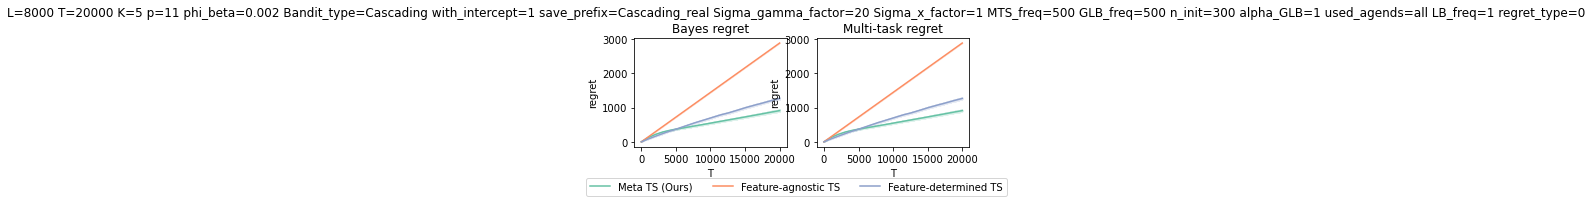

In [9]:
run.plot_regret(ci=68,plot_mean = False)

In [10]:
1

1